In [1]:
import pandas as pd
import numpy as np

In [2]:
#Read in LasVegas full dataset
LV_df = pd.read_csv('LV_df.csv')
len(LV_df)

/Users/apple/anaconda/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,4,6,17,18,32,34,36,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1325315

In [3]:
#Select all open business
LV_df_open = LV_df[LV_df.is_open == 1]
len(LV_df_open)

1180769

In [4]:
#rename colnames to be more clear
LV_df_open = LV_df_open.rename(columns={'cool_x':'cool_review','funny_x':'funny_review','stars_x':'stars_rev',
                                        'type_x':'type_review','useful_x':'useful_review',
                                        'name_x': 'name_biz', 'review_count_x': 'review_count_biz',
                                        'stars_y':'stars_biz', 'type_y':'type_biz','cool_y':'cool_usr',
                                        'funny_y':'funny_usr','name_y':'name_usr',
                                        'review_count_y':'review_count_usr','useful_y':'useful_usr'})

In [5]:
#Groupby business and user
LV_df_BYuser = LV_df_open.groupby('user_id',as_index=False).count()
LV_df_BYitem = LV_df_open.groupby('business_id',as_index=False).count()
print "total open biz in LV:", len(LV_df_BYitem)
print "total users:", len(LV_df_BYuser)
print "mean # of ratings each user generated:", LV_df_BYuser.business_id.mean()
print "median # of ratings each user generated:", np.median(LV_df_BYuser.business_id)
print "mean # of reviews each business received:", LV_df_BYitem.user_id.mean()
print "median # of reviews each business received:", np.median(LV_df_BYitem.user_id)

total open biz in LV: 20342
total users: 388608
mean # of ratings each user generated: 3.0384577775
median # of ratings each user generated: 1.0
mean # of reviews each business received: 58.0458656966
median # of reviews each business received: 12.0


# Plot business and user reviews distribution

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import math

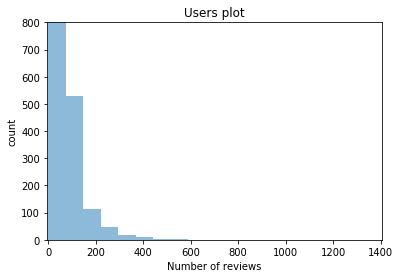

In [7]:
#Histogram of number of reviews given by users
bins = np.linspace(math.ceil(LV_df_BYuser.business_id.min()), 
                   math.floor(LV_df_BYuser.business_id.max()),
                   20) # fixed number of bins

plt.xlim([LV_df_BYuser.business_id.min()-5, LV_df_BYuser.business_id.max()+5])
plt.ylim(0,800)
plt.hist(LV_df_BYuser.business_id, bins=bins, alpha=0.5)
plt.title('Users plot')
plt.xlabel('Number of reviews')
plt.ylabel('count')

plt.show()

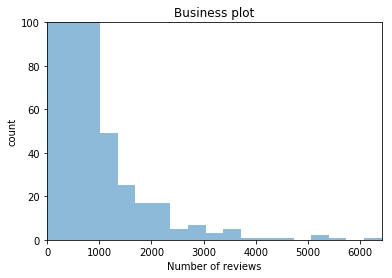

In [8]:
#Histogram of number of reviews received by business
bins = np.linspace(math.ceil(LV_df_BYitem.user_id.min()), 
                   math.floor(LV_df_BYitem.user_id.max()),
                   20) # fixed number of bins

plt.xlim([LV_df_BYitem.user_id.min()-5, LV_df_BYitem.user_id.max()+5])
plt.ylim(0,100)
plt.hist(LV_df_BYitem.user_id, bins=bins, alpha=0.5)
plt.title('Business plot')
plt.xlabel('Number of reviews')
plt.ylabel('count')

plt.show()

# Experts

In [9]:
#Tried to trim users who gave less or equal than median # of reviews(1)
usr_left = pd.DataFrame(LV_df_BYuser[LV_df_BYuser.business_id > 1].iloc[:,0])

In [10]:
usr_left['left']=1

In [11]:
usr_left.head()

,user_id,left
0,---1lKK3aKOuomHnwAkAow,1
2,--0kuuLmuYBe3Rmu0Iycww,1
4,--104qdWvE99vaoIsj9ZJQ,1
5,--1mPJZdSY9KluaBYAGboQ,1
7,--2vR0DIsmQ6WfcSzKWigw,1


In [12]:
#Business left after trim users
result = pd.merge(LV_df_open, usr_left, on='user_id', how='inner')

In [13]:
len(result)

955923

In [14]:
len(result)/(1.0*len(LV_df_open))

0.8095766403081381

In [15]:
#Tried to trim business which received less or equal than median # of reviews(12)
biz_left = pd.DataFrame(LV_df_BYitem[LV_df_BYitem.user_id > 12].iloc[:,0])
biz_left['left']=1
biz_left.head()

,business_id,left
0,--9e1ONYQuAa-CB_Rrw7Tw,1
4,--e8PjCNhEz32pprnPhCwQ,1
6,--z7PM8AGaJP0aBmGMY7RA,1
7,-0BxAGlIk5DJAGVkpqBXxg,1
10,-0qht1roIqleKiQkBLDkbw,1


In [16]:
result_biz = pd.merge(LV_df_open, biz_left, on='business_id', how='inner')
len(result_biz)/(1.0*len(LV_df_open))

0.9465263739139493

# User explor

In [17]:
yelp_usr = pd.read_csv('yelp_user.csv')

In [18]:
yelp_biz = pd.read_csv('yelp_business.csv')

In [19]:
yelp_review = pd.read_csv('yelp_review.csv')

/Users/apple/anaconda/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
biz_rev_usr = pd.merge(pd.merge(yelp_review, yelp_biz, on='business_id'), yelp_usr, on='user_id')

In [106]:
biz_rev_usr.columns.values

array(['Unnamed: 0_x', 'business_id', 'cool_x', 'date', 'funny_x',
       'review_id', 'stars_x', 'text', 'type_x', 'useful_x', 'user_id',
       'Unnamed: 0_y', 'address', 'attributes', 'categories', 'city',
       'hours', 'is_open', 'latitude', 'longitude', 'name_x',
       'neighborhood', 'postal_code', 'review_count_x', 'stars_y', 'state',
       'type_y', 'Unnamed: 0', 'average_stars', 'compliment_cool',
       'compliment_cute', 'compliment_funny', 'compliment_hot',
       'compliment_list', 'compliment_more', 'compliment_note',
       'compliment_photos', 'compliment_plain', 'compliment_profile',
       'compliment_writer', 'cool_y', 'elite', 'fans', 'friends',
       'funny_y', 'name_y', 'review_count_y', 'type', 'useful_y',
       'yelping_since'], dtype=object)

In [ ]:
yelp_df = biz_rev_usr[['business_id','review_id','user_id','city','is_open','name_x',
                      'state','review_count_y']]